# CAR SALES FORECAST WITH MULTI-LAYER PERCEPTRON
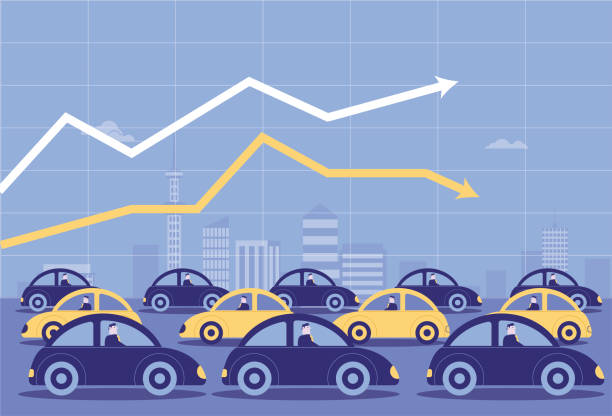

## This dataset contains the number of vehicle sales realized in a certain period. The number of sales was kept for every month. We will forecast sales numbers for the next 6 months using MLP.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt;
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars-sales-for-time-series-prediction/sales-cars.csv


In [2]:
df_cars = pd.read_csv('/kaggle/input/cars-sales-for-time-series-prediction/sales-cars.csv')

Let's see how our dataset looks like.

In [3]:
df_cars.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In this part, we convert the Month column of the data to date format.

In [4]:
df_cars.index = pd.to_datetime(df_cars.Month, format='%Y-%m')

In [5]:
df_cars = df_cars.resample("M").sum()

In [6]:
df_cars.head()

,Sales
Month,
2016-01-31,266
2016-02-29,146
2016-03-31,183
2016-04-30,119
2016-05-31,180


The sales chart is as follows.

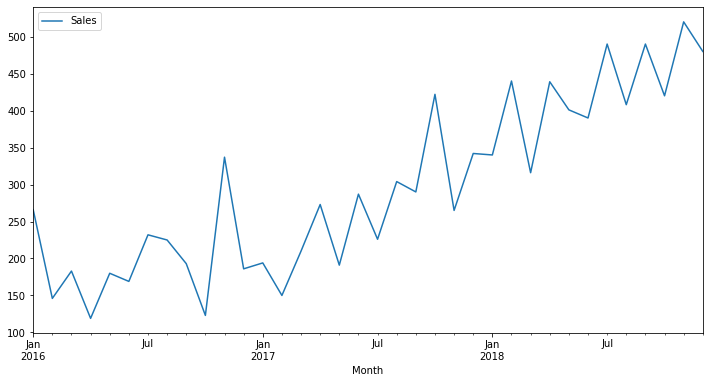

In [7]:
df_cars.plot(figsize=(12,6));

In [8]:
# Seasonal Decompose

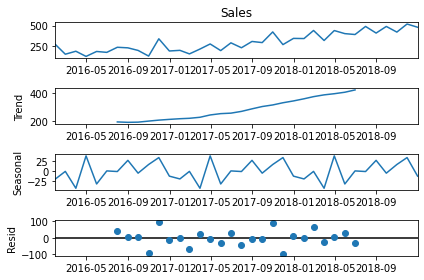

In [9]:
results = seasonal_decompose(df_cars['Sales'])
results.plot();

**We want to forecast for the next 6 months. However, we will not be able to see how successful the results we produced are, as we do not have actual sales data to compare our predicted results with. Therefore, to measure the success of the forecast, I set aside the last 6 months of the data as test data. I leave the rest as a train. We will predict the next 6 months from the train data and compare it with the real values in the test data.**

In [10]:
# Train Test Split
train = df_cars[:-6]
test = df_cars[-6:]

In [11]:
train.head()

,Sales
Month,
2016-01-31,266
2016-02-29,146
2016-03-31,183
2016-04-30,119
2016-05-31,180


In [12]:
test.head()

,Sales
Month,
2018-07-31,490
2018-08-31,408
2018-09-30,490
2018-10-31,420
2018-11-30,520


In [13]:
# Generate Lags

In [14]:
def generate_lag(df, n):
    X, y = [], []
    for i in range(len(df) - n):
        X.append(df[i:i+n])
        y.append(df[n+i])
    
    return np.array(X), np.array(y), np.array(y[-n:]).reshape(1,n)

In [15]:
X, y, last_batch_values = generate_lag(train.Sales.values, 12)

In [16]:
X

array([[266, 146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186],
       [146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194],
       [183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150],
       [119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210],
       [180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273],
       [169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191],
       [232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287],
       [225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226],
       [193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304],
       [123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290],
       [337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422],
       [186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265],
       [194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342],
       [150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340],
       [210, 273, 191, 287, 226, 3

In [17]:
y

array([194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340,
       440, 316, 439, 401, 390])

In [18]:
last_batch_values

array([[226, 304, 290, 422, 265, 342, 340, 440, 316, 439, 401, 390]])

In [19]:
# Build Model 

# Build the Model

In [20]:
def mlp_model(input_, y_, epochs=1000):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=input_.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    print(model.fit(input_, y_, epochs=epochs))
    return model

In [21]:
model = mlp_model(X,y, epochs=3000)
model


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

Epoch 1/3000
1/1 [==============================] - 1s 553ms/step - loss: 36101.9258
Epoch 2/3000
1/1 [==============================] - 0s 4ms/step - loss: 27837.2578
Epoch 3/3000
1/1 [==============================] - 0s 5ms/step - loss: 20807.4766
Epoch 4/3000
1/1 [==============================] - 0s 4ms/step - loss: 15017.0205
Epoch 5/3000
1/1 [==============================] - 0s 3ms/step - loss: 10555.5146
Epoch 6/3000
1/1 [==============================] - 0s 3ms/step - loss: 7359.4062
Epoch 7/3000
1/1 [==============================] - 0s 4ms/step - loss: 5358.5493
Epoch 8/3000
1/1 [==============================] - 0s 3ms/step - loss: 4415.4966
Epoch 9/3000
1/1 [==============================] - 0s 3ms/step - loss: 4322.9517
Epoch 10/3000
1/1 [==============================] - 0s 3ms/step - loss: 4835.8628
Epoch 11/3000
1/1 [==============================] - 0s 3ms/step - loss: 5673.5054
Epoch 12/3000
1/1 [==============================] - 0s 3ms/step - loss: 6569.6826
Epoch 

# Forecast

In [22]:
def forecast_function(model, last_batch, n):
    in_value = last_batch.copy()
    preds = []
    for i in range(n):
        p = model.predict(in_value)
        preds.append(p.ravel())
        in_value = np.append(in_value, p)[1:].reshape(last_batch.shape)
    return np.array(preds).ravel()

In [23]:
pred = forecast_function(model, last_batch_values, 6)

In [24]:
pred

array([454.1099 , 540.74   , 508.658  , 423.62256, 589.0421 , 594.01447],
      dtype=float32)

In [25]:
test['Predicted_Sales']=pred

In [26]:
test.head()

,Sales,Predicted_Sales
Month,,
2018-07-31,490,454.109894
2018-08-31,408,540.739990
2018-09-30,490,508.657990
2018-10-31,420,423.622559
2018-11-30,520,589.042114


# Show the difference between Sales and Predicted Sales values

<AxesSubplot:xlabel='Month'>

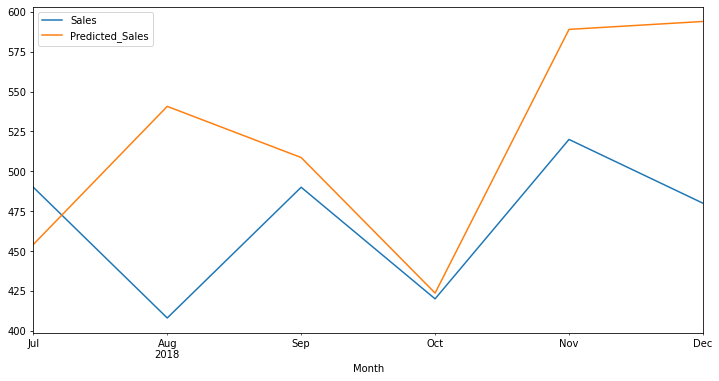

In [27]:
test.plot(figsize=(12,6))

# Calculate error line by line between sales and predicted sales as percentage in test data

In [28]:
def error_function(df,column_1,column_2):
    data = df.copy()
    my_list = []
    for i in range(len(data)):
        x = (data[column_2][i]*100)/data[column_1][i]
        if x >= 100:
            error = x-100
            #data['error_percentage'][i] = error
            my_list.append(error)
        else:
            error = 100-x
            my_list.append(error)
            #data['error_percentage'][i] = error
    data['error_percentage'] = my_list
    return data

In [29]:
column_1 = 'Sales'
column_2 = 'Predicted_Sales'
df_new = error_function(test,column_1,column_2)

In [30]:
df_new

,Sales,Predicted_Sales,error_percentage
Month,,,
2018-07-31,490,454.109894,7.324511
2018-08-31,408,540.739990,32.534311
2018-09-30,490,508.657990,3.807753
2018-10-31,420,423.622559,0.862514
2018-11-30,520,589.042114,13.277330
2018-12-31,480,594.014465,23.753014


# Find the average error

In [31]:
def mean_error(df,error_column):
    total = 0
    for i in range(len(df)):
        total += df[error_column][i]
    mean_error_ = total/(len(df))
    return mean_error_

In [32]:
error_rate = mean_error(df_new,'error_percentage')

In [33]:
error_rate

13.593238831310082

**If we want see how many cars sold in reality, and how much we predicted. Then, we'll find the percentage error.**

In [34]:
sum_of_actual_sales = sum(df_new.Sales.values)

In [35]:
sum_of_actual_sales

2808

In [36]:
sum_of_predicted_sales = sum(df_new.Predicted_Sales.values)

In [37]:
sum_of_predicted_sales

3110.18701171875

In [38]:
rate_of_actual_and_predict_sums = (sum_of_predicted_sales*100)/sum_of_actual_sales

In [39]:
if rate_of_actual_and_predict_sums >= 100:
    total_percentage = rate_of_actual_and_predict_sums - 100
else:
    total_percentage = 100-rate_of_actual_and_predict_sums

In [40]:
print('Percentage error: ',total_percentage)

Percentage error:  10.761645716479705
